Importing libraries

In [231]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

loding dataset

In [232]:
df=pd.read_csv("industrial_sensor_data.csv")

In [233]:
df

,SensorID,Temperature,Pressure,Vibration,Humidity,FlowRate,PowerConsumption,RuntimeHours,LastServiceDate,FaultFlag
0,1.0,46.835910,35.271635,6.482570,83.950461,65.776326,249.835122,1291.381337,01-01-2023,1.0
1,2.0,95.810716,40.850663,1.723864,56.775234,8.923224,373.373386,804.836988,01-01-2023,1.0
2,3.0,77.219485,16.271055,8.723946,70.743719,24.990651,281.333390,943.818220,01-01-2023,0.0
3,4.0,65.885971,33.119334,6.131162,50.523381,77.594255,41.651292,1433.449565,01-01-2023,1.0
4,5.0,28.261584,30.728569,1.572039,64.102420,53.339900,92.790118,1752.612059,01-01-2023,1.0
...,...,...,...,...,...,...,...,...,...,...
2995,2996.0,88.550140,35.799591,5.149295,20.325114,65.437465,310.928043,301.929986,05-05-2023,0.0
2996,2997.0,28.368223,27.644919,1.653704,81.156806,18.602036,380.266101,1647.148555,05-05-2023,1.0
2997,2998.0,41.331968,39.431698,9.777128,41.512763,6.072715,362.845925,627.321818,05-05-2023,1.0
2998,2999.0,39.653870,26.838079,1.079246,85.701220,68.613198,346.015348,908.187089,05-05-2023,1.0


removing unnecessary columns

In [234]:
faultFalg=df["FaultFlag"]
df.drop(["SensorID","FaultFlag"],axis=1,inplace=True)

checking for null values and handling them

In [235]:
df.isnull().sum()

Temperature         44
Pressure            43
Vibration           37
Humidity            60
FlowRate            50
PowerConsumption    49
RuntimeHours        50
LastServiceDate     37
dtype: int64

In [236]:
df.dropna(inplace=True)

In [237]:
timestanp=df["LastServiceDate"]

In [238]:
df.drop(["LastServiceDate"],axis=1,inplace=True)

In [239]:
df

,Temperature,Pressure,Vibration,Humidity,FlowRate,PowerConsumption,RuntimeHours
0,46.835910,35.271635,6.482570,83.950461,65.776326,249.835122,1291.381337
1,95.810716,40.850663,1.723864,56.775234,8.923224,373.373386,804.836988
2,77.219485,16.271055,8.723946,70.743719,24.990651,281.333390,943.818220
3,65.885971,33.119334,6.131162,50.523381,77.594255,41.651292,1433.449565
4,28.261584,30.728569,1.572039,64.102420,53.339900,92.790118,1752.612059
...,...,...,...,...,...,...,...
2995,88.550140,35.799591,5.149295,20.325114,65.437465,310.928043,301.929986
2996,28.368223,27.644919,1.653704,81.156806,18.602036,380.266101,1647.148555
2997,41.331968,39.431698,9.777128,41.512763,6.072715,362.845925,627.321818
2998,39.653870,26.838079,1.079246,85.701220,68.613198,346.015348,908.187089


scaling the features

In [240]:
scaler=StandardScaler()
standrad_df=scaler.fit_transform(df)

In [241]:
new_df=pd.DataFrame(standrad_df,
                    columns=scaler.get_feature_names_out(),
                    index=df.index
                   )

In [242]:
new_df

,Temperature,Pressure,Vibration,Humidity,FlowRate,PowerConsumption,RuntimeHours
0,-0.429565,0.616962,0.557785,1.419040,0.534264,-0.016473,0.459844
1,1.539346,1.046561,-1.109595,0.070043,-1.454741,0.847176,-0.386880
2,0.791932,-0.846130,1.343130,0.763448,-0.892622,0.203730,-0.145013
3,0.336296,0.451230,0.434657,-0.240304,0.947715,-1.471873,0.707083
4,-1.176300,0.267135,-1.162792,0.433769,0.099176,-1.114364,1.262515
...,...,...,...,...,...,...,...
2995,1.247453,0.657616,0.090625,-1.739367,0.522409,0.410624,-1.262079
2996,-1.172013,0.029686,-1.134178,1.280361,-1.116128,0.895362,1.078979
2997,-0.650837,0.937297,1.712149,-0.687597,-1.554466,0.773579,-0.695806
2998,-0.718301,-0.032443,-1.335460,1.505949,0.633512,0.655917,-0.207021


using PAC for data reduction

In [243]:
features = new_df.drop(columns=['anamoly'], errors='ignore')
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)

implementing model and fitting processed data

In [244]:
model=IsolationForest(n_estimators=1000,contamination=0.05,random_state=0)
model.fit(pca_components)

IsolationForest(contamination=0.05, n_estimators=1000, random_state=0)

making prediction

In [245]:
anamoly=model.predict(pca_components)
anamoly = np.where(anamoly == -1, 1, 0)

In [246]:
new_df=pd.DataFrame(pca_components,
                    columns=("A","B"),
                    index=new_df.index)

In [247]:
new_df['anamoly']=anamoly

In [248]:
new_df

,A,B,anamoly
0,0.228197,-0.923872,0
1,-0.221474,0.868853,0
2,1.392552,-0.495430,0
3,-0.306018,-1.271780,0
4,-1.662226,-1.315107,0
...,...,...,...
2995,0.393046,1.737386,0
2996,-1.008868,-0.368505,0
2997,-0.398342,1.273568,0
2998,0.139492,0.009548,0


plotting scatter plot

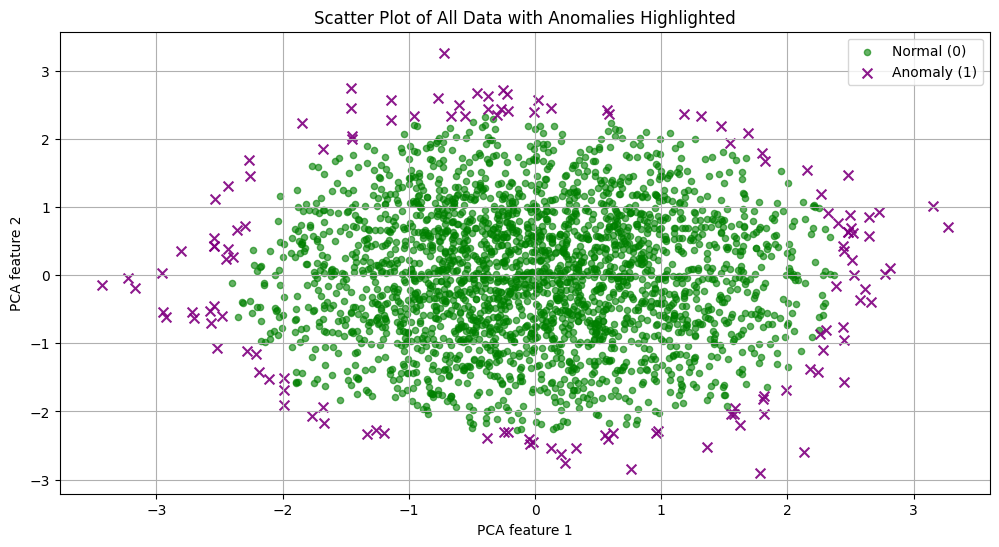

In [249]:
normal_data = new_df[new_df['anamoly'] == 0]
anomaly_data = new_df[new_df['anamoly'] == 1]

plt.figure(figsize=(12, 6))

plt.scatter(normal_data['A'], normal_data['B'], color='green', label='Normal (0)', alpha=0.6,s=20)

plt.scatter(anomaly_data['A'], anomaly_data['B'], color='purple', label='Anomaly (1)',marker="x",alpha=0.9,s=50)

plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
plt.title('Scatter Plot of All Data with Anomalies Highlighted')
plt.legend()
plt.grid(True)
plt.show()

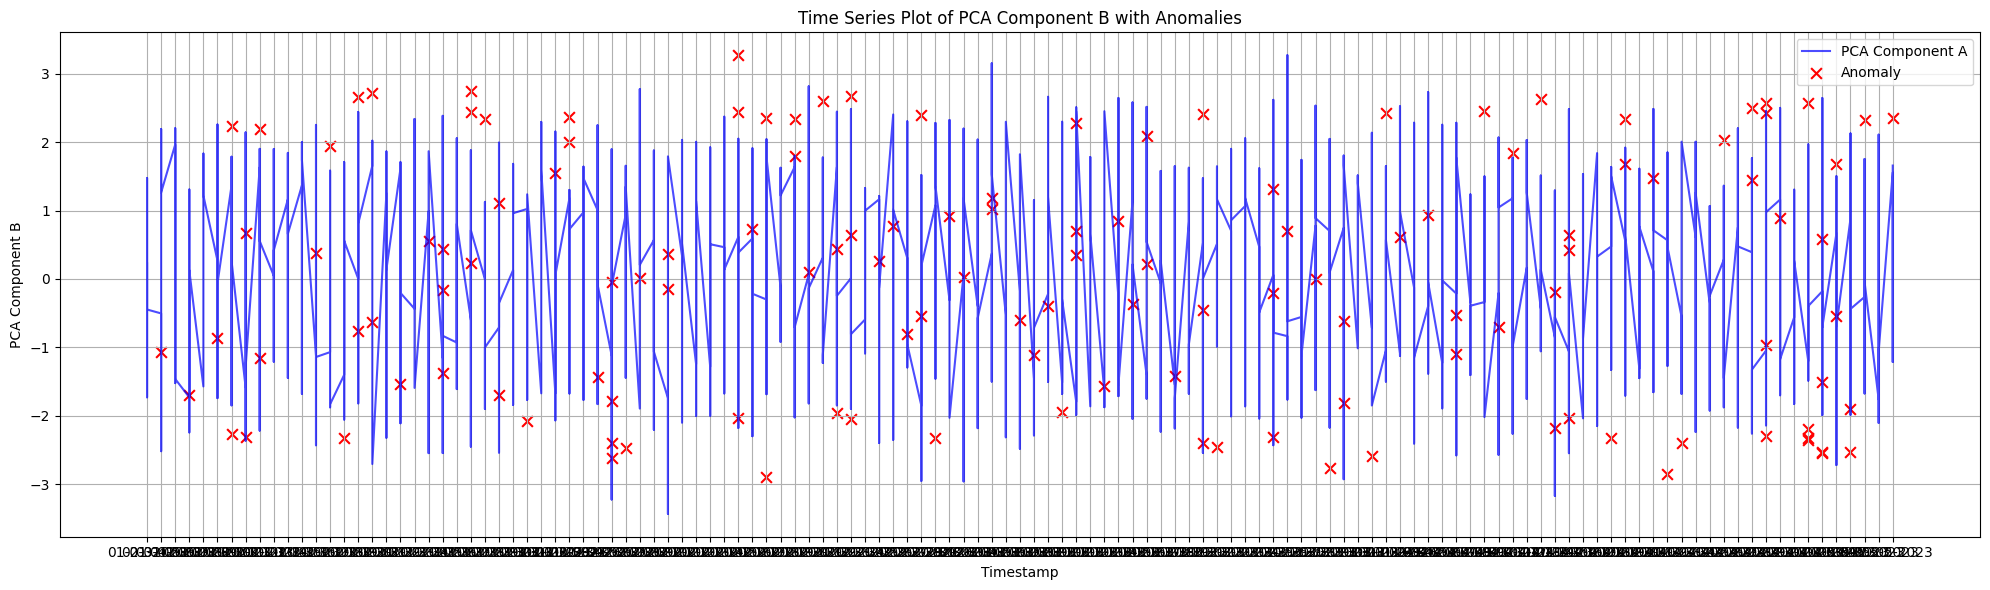

In [250]:
pca_df = pd.DataFrame(new_df, columns=['A', 'B'], index=df.index)
pca_df['Anomaly'] = anamoly
pca_df['Timestamp'] = timestanp # replace 'Timestamp' if your column name differs

plt.figure(figsize=(20, 6))
plt.plot(pca_df['Timestamp'], pca_df['A'], label='PCA Component A', color='blue', alpha=0.7)

plt.scatter(
    pca_df[pca_df['Anomaly'] == 1]['Timestamp'],
    pca_df[pca_df['Anomaly'] == 1]['B'],
    color='red', label='Anomaly', marker='x', s=60
)

plt.xlabel('Timestamp')
plt.ylabel('PCA Component B')
plt.title('Time Series Plot of PCA Component B with Anomalies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
